<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Prediction

## Contents:
1. [Problem Statement](#Problem-Statement)
2. [Import Libraries](#Import-Libraries)
3. [Data Dictionary](#Data-Dictionary)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - Step 0. Import data
    - Step 1. Find features with strong correlation to saleprice
    - Step 2. Drop off specific skewed features
    - Step 3. Fill null values
    - Step 4. Feature engineering, get rid of multicollinearity
    - Step 5. Dealing with outliers
5. [Get Dummies on Categorical columns](#Get-Dummies)
6. [Model Preparation](#Model-Preparation)
    - Create features matrix (X) and target vector (Y)
    - Train/test split
    - Standard Scaler
    - Check skewness
6. [Model Fitting](#Model-Fitting)
    - Linear Regression (Base model)
    - GridSearch (LR, Ridge, Lasso, ElasticNet)
    - Evaluating the best model
    - Visualisations to infer results
7. [Kaggle Submission](#Kaggle-Submission)

## Problem Statement
*Back to [Contents](#Contents:)*

We are a general insurance company based in Ames, Iowa specializing in home insurance. Customers typically come to us for home valuation services.

We have noticed through feedback forms that customers find our application forms:
- Tedious and overly complicated
- Usually take more than an hour for customers to fill up (total of 80 questions)
- Customers do not want to spend more than 10 mins

Due to the high dropout rates, management is concerned with the loss of revenue and share of customers to our competitors, who offer quicker and more accurate processing times.

As a group of data scientists within the firm, we have been tasked to simplify the application process through automating this process using machine learning models.

These predictive underwriting models will help to:
- Effectively predict the valuation of the property
- Improve efficiencies and the overall customer end-to-end experience
- Increasing take-up rate due to straight through processing

### Datasets used in this project
* [`train.csv`](./datasets/train.csv): A dataset containing 80 housing features of 2051 residential homes sold in Ames, Iowa from 2006 to 2010. In addition, the sale prices are given for all 2051 of these houses.
* [`test.csv`](./datasets/test.csv): A dataset containing the same housing features as above of 878 homes.

## Import Libraries
*Back to [Contents](#Contents:)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm

## Data Dictionary
*Back to [Contents](#Contents:)*

**Data Dictionary to be used for both Train and Test dataframes**

| Feature         | Type    | Description                                                            |
|-----------------|---------|------------------------------------------------------------------------|
| id              | int64   | ID of sale transaction                                                 |
| pid             | int64   | Property ID                                                            |
| ms_subclass     | int64   | Building class                                                         |
| ms_zoning       | object  | Identifies the general zoning classification of the sale               |
| lot_frontage    | float64 | Linear feet of street connected to property                            |
| lot_area        | int64   | Lot size in square feet                                                |
| street          | object  | Type of road access to property                                        |
| alley           | object  | Type of alley access to property                                       |
| lot_shape       | object  | General shape of property                                              |
| land_contour    | object  | Flatness of the property                                               |
| utilities       | object  | Type of utilities available                                            |
| lot_config      | object  | Lot configuration                                                      |
| land_slope      | object  | Slope of property                                                      |
| neighborhood    | object  | Physical locations within Ames city limits                             |
| condition_1     | object  | Proximity to main road or railroad                                     |
| condition_2     | object  | Proximity to main road or railroad (if a second is present)            |
| bldg_type       | object  | Type of dwelling                                                       |
| house_style     | object  | Style of dwelling                                                      |
| overall_qual    | int64   | Overall material and finish quality                                    |
| overall_cond    | int64   | Overall condition rating                                               |
| year_built      | int64   | Original construction date                                             |
| year_remod/add  | int64   | Remodel date (same as construction date if no remodeling or additions) |
| roof_style      | object  | Type of roof                                                           |
| roof_matl       | object  | Roof material                                                          |
| exterior_1st    | object  | Exterior covering on house                                             |
| exterior_2nd    | object  | Exterior covering on house (if more than one material)                 |
| mas_vnr_type    | object  | Masonry veneer type                                                    |
| mas_vnr_area    | float64 | Masonry veneer area in square feet                                     |
| exter_qual      | object  | Exterior material quality                                              |
| exter_cond      | object  | Present condition of the material on the exterior                      |
| foundation      | object  | Type of foundation                                                     |
| bsmt_qual       | object  | Height of the basement                                                 |
| bsmt_cond       | object  | General condition of the basement                                      |
| bsmt_exposure   | object  | Walkout or garden level basement walls                                 |
| bsmtfin_type_1  | object  | Quality of basement finished area                                      |
| bsmtfin_sf_1    | float64 | Type 1 finished square feet                                            |
| bsmtfin_type_2  | object  | Quality of second finished area (if present)                           |
| bsmtfin_sf_2    | float64 | Type 2 finished square feet                                            |
| bsmt_unf_sf     | float64 | Unfinished square feet of basement area                                |
| total_bsmt_sf   | float64 | Total square feet of basement area                                     |
| heating         | object  | Type of heating                                                        |
| heating_qc      | object  | Heating quality and condition                                          |
| central_air     | object  | Central air conditioning                                               |
| electrical      | object  | Electrical system                                                      |
| 1st_flr_sf      | int64   | First Floor square feet                                                |
| 2nd_flr_sf      | int64   | Second floor square feet                                               |
| low_qual_fin_sf | int64   | Low quality finished square feet (all floors)                          |
| gr_liv_area     | int64   | Above grade (ground) living area square feet                           |
| bsmt_full_bath  | float64 | Basement full bathrooms                                                |
| bsmt_half_bath  | float64 | Basement half bathrooms                                                |
| full_bath       | int64   | Full bathrooms above grade                                             |
| half_bath       | int64   | Half baths above grade                                                 |
| bedroom_abvgr   | int64   | Number of bedrooms above basement level                                |
| kitchen_abvgr   | int64   | Number of kitchens                                                     |
| kitchen_qual    | object  | Kitchen quality                                                        |
| totrms_abvgrd   | int64   | Total rooms above grade (does not include bathrooms)                   |
| functional      | object  | Home functionality rating                                              |
| fireplaces      | int64   | Number of fireplaces                                                   |
| fireplace_qu    | object  | Fireplace quality                                                      |
| garage_type     | object  | Garage location                                                        |
| garage_yr_blt   | float64 | Year garage was built                                                  |
| garage_finish   | object  | Interior finish of the garage                                          |
| garage_cars     | float64 | Size of garage in car capacity                                         |
| garage_area     | float64 | Size of garage in square feet                                          |
| garage_qual     | object  | Garage quality                                                         |
| garage_cond     | object  | Garage condition                                                       |
| paved_drive     | object  | Paved driveway                                                         |
| wood_deck_sf    | int64   | Wood deck area in square feet                                          |
| open_porch_sf   | int64   | Open porch area in square feet                                         |
| enclosed_porch  | int64   | Enclosed porch area in square feet                                     |
| 3ssn_porch      | int64   | Three season porch area in square feet                                 |
| screen_porch    | int64   | Screen porch area in square feet                                       |
| pool_area       | int64   | Pool area in square feet                                               |
| pool_qc         | object  | Pool quality                                                           |
| fence           | object  | Fence quality                                                          |
| misc_feature    | object  | Miscellaneous feature not covered in other categories                  |
| misc_val        | int64   | $Value of miscellaneous feature                                        |
| mo_sold         | int64   | Month Sold                                                             |
| yr_sold         | int64   | Year Sold                                                              |
| sale_type       | object  | Type of sale                                                           |
| saleprice       | int64   | Sale Price                                                             |

*Back to [Data Dictionary](#Data-Dictionary)*

## Exploratory Data Analysis
*Back to [Contents](#Contents:)*

### Step 0. Import data
- To clean up train and test datasets based on EDA done in previous notebook

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [4]:
# rename the columns
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ','_')

In [5]:
train.columns.sort_values()

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air',
       'condition_1', 'condition_2', 'electrical', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence',
       'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional',
       'garage_area', 'garage_cars', 'garage_cond', 'garage_finish',
       'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating', 'heating_qc', 'house_style', 'id',
       'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope',
       'lot_area', 'lot_config', 'lot_frontage', 'lot_shape',
       'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature',
       'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood',
       

We see too many features and would need to decide which to keep and which to drop.

This will be the thought process:
1. Find strong predictors to keep
2. Drop skewed columns
3. Fill up null values appropriately
4. Feature engineering (combine columns or binarize)
5. Drop outliers

### Step 1: Checking the correlation of stronger predictors against sale price

In [6]:
corr_table = train.corr()['saleprice']
corr_table[abs(corr_table)>0.6].sort_values(ascending=False)

saleprice        1.000000
overall_qual     0.800207
gr_liv_area      0.697038
garage_area      0.650270
garage_cars      0.648220
total_bsmt_sf    0.628925
1st_flr_sf       0.618486
Name: saleprice, dtype: float64

Out of the 39 numerical columns, only 6 of them have a correlation above 0.6. These columns describe the overall quality, the gross living area (includes the basement and first floor) and the size of the garage. We will try to binarize some of the categorical columns and check the correlation again, at the same time drop selected columns with a high single value.

### Step 2: Drop off specific columns with high % of nulls, zeros or single values

We will drop off as many columns as we can to reduce the number of features, especially those that are not in the above list of possibly good predictors. We can also try to be selective in choosing to keep some columns with features that we think can significantly affect the sales price of a house.

In [7]:
# write function to find columns with high % of nulls, zeros or single values

def skewed_columns(df):
    list_of_skewed_cols = []
    for col in df.columns:
        pct_null = round(df[col].isnull().sum()/len(df[col])*100,2)
        
        # for categorical columns
        if df[col].dtype == np.object:
            pct_single_value = round(df[col].value_counts()[0]/len(df)*100,2)
            
            if pct_single_value > 70 or pct_null >70:
                print(f'------{col}------')
                print('This variable has high percentage of a single value.')
                print(train[col].value_counts())
                print('% single value: ', pct_single_value)
                print('% nulls: ', pct_null)
                print('\n')
                list_of_skewed_cols.append(col)
            
        # for numerical columns
        else:
            pct_zeros = round(len(df[df[col]==0])/len(df)*100,2)
            featcorr_saleprice = round(df[col].corr(df['saleprice']),2)
            
            if pct_zeros > 70 or pct_null>70:
                print(f'------{col}------')
                print('This variable has high percentage of zeros.')
                print(train[col].value_counts())
                print('% zeros: ', pct_zeros)
                print('% nulls: ', pct_null)
                print('Correlation with sale price: ', featcorr_saleprice )
                print('\n')
                list_of_skewed_cols.append(col)
    
    return list_of_skewed_cols

In [8]:
# shows all the skewed features with their values
skewed_columns(train)

------ms_zoning------
This variable has high percentage of a single value.
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64
% single value:  77.91
% nulls:  0.0


------street------
This variable has high percentage of a single value.
Pave    2044
Grvl       7
Name: street, dtype: int64
% single value:  99.66
% nulls:  0.0


------alley------
This variable has high percentage of a single value.
Grvl    85
Pave    55
Name: alley, dtype: int64
% single value:  4.14
% nulls:  93.17


------land_contour------
This variable has high percentage of a single value.
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64
% single value:  89.86
% nulls:  0.0


------utilities------
This variable has high percentage of a single value.
AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64
% single value:  99.9
% nulls:  0.0


------lot_config------
This variabl

['ms_zoning',
 'street',
 'alley',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'condition_1',
 'condition_2',
 'bldg_type',
 'roof_style',
 'roof_matl',
 'exter_cond',
 'bsmt_cond',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'heating',
 'central_air',
 'electrical',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'functional',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'pool_qc',
 'fence',
 'misc_feature',
 'misc_val',
 'sale_type']

In [9]:
# Select columns to keep
# Based on own judgment, these columns are likely to affect sales price significantly
# Will combine all the porches features later into a total size of porch and deck feature

skewed_cols_tokeep = ['ms_zoning', 'lot_config', 'condition_1', 'bldg_type',\
                      'functional', 'pool_area', 'misc_feature', 'misc_val', 'pool_qc',\
                      'enclosed_porch', '3ssn_porch', 'screen_porch']
                      
# Since these columns are skewed and correlation with the sale price not so high,
# easier to drop to reduce number of features                      
skewed_cols_todrop = ['street', 'alley', 'land_contour', 'utilities', 'land_slope',\
                      'condition_2', 'roof_style', 'roof_matl', 'exter_cond', 'bsmt_cond',\
                      'bsmtfin_type_2', 'bsmtfin_sf_2', 'heating', 'central_air', 'electrical',\
                      'low_qual_fin_sf', 'bsmt_half_bath', 'garage_qual', 'garage_cond',\
                      'paved_drive', 'fence', 'sale_type']

print(f'We will drop {len(skewed_cols_todrop)} skewed columns.')

We will drop 22 skewed columns.


In [10]:
train = train.drop(skewed_cols_todrop, axis=1)
print(f'After dropping, we have {len(train.columns)} columns.')

After dropping, we have 59 columns.


### Step 3. Check and fill null values

In [11]:
#create a null values dataframe
dfnull = pd.DataFrame(train.isnull().sum(), columns=['nullcounts'])
dfnull = dfnull[dfnull['nullcounts']!=0]
print(dfnull.shape)
dfnull.sort_values('nullcounts', ascending=False)

(18, 1)


,nullcounts
pool_qc,2042
misc_feature,1986
fireplace_qu,1000
lot_frontage,330
garage_yr_blt,114
garage_finish,114
garage_type,113
bsmt_exposure,58
bsmtfin_type_1,55
bsmt_qual,55


There are now 18 out of 81 columns with null values, which should be relatively simple to fill in with appropriate values first. At the same time, we will decide if it is worth keeping the column, changing it into something else, dropping it altogether.

In [12]:
# write for loop to display values of features with null

for col in dfnull.index:
    print(col)
    print(train[col].value_counts())
    print('No of null values: ', train[col].isnull().sum())
    print('% of null values:', round(train[col].isnull().sum()/len(train[col])*100,2),'%')
    print('\n')

lot_frontage
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
118.0      1
137.0      1
195.0      1
115.0      1
135.0      1
Name: lot_frontage, Length: 118, dtype: int64
No of null values:  330
% of null values: 16.09 %


mas_vnr_type
None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
No of null values:  22
% of null values: 1.07 %


mas_vnr_area
0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: mas_vnr_area, Length: 373, dtype: int64
No of null values:  22
% of null values: 1.07 %


bsmt_qual
TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64
No of null values:  55
% of null values: 2.68 %


bsmt_exposure
No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64
No of null values:  58
% of null values: 2.83 %


bsmtfin_type_1
GLQ    615
Unf    603
ALQ 

In [13]:
dfnull.index

Index(['lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmt_unf_sf',
       'total_bsmt_sf', 'bsmt_full_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'pool_qc', 'misc_feature'],
      dtype='object')

In [14]:
def fillnull(input_df):
    
    # make copy of the input df
    copy_df = input_df.copy()
    
    # create quality mapping dictionary
    qual_dict = {'Ex': 5,
                 'Gd': 4,
                 'TA': 3,
                 'Fa': 2,
                 'Po': 1,
                 'NA': 0}
    
    # create basement exposure dictionary
    bsmt_exposure_dict = {'NA': 0,
                          'No': 1,
                          'Mn': 2,
                          'Av': 3,
                          'Gd': 4}
        
    # FILL NULL VALUES WITH ZEROS OR NA---------------------------------------------------------
    
    # lot frontage
    copy_df['lot_frontage'].fillna(0.0, inplace=True)
    
    # masonry veneer type: 4 types(None, BrkFace, Stone, Others)
    copy_df['mas_vnr_type'].fillna('None', inplace=True)
    
    copy_df['mas_vnr_type'] = \
    copy_df['mas_vnr_type'].apply(lambda x: 'Others' if x not in ['None','BrkFace', 'Stone'] else x)
    
    # masonry veneer
    copy_df['mas_vnr_area'].fillna(0.0, inplace=True)
    
    # basement features - will just keep 4 features, do some feature engineering and drop the rest
    
    copy_df['bsmt_qual'].fillna('NA', inplace=True)
    copy_df['bsmt_qual'] = copy_df['bsmt_qual'].map(qual_dict)
    
    copy_df['bsmt_exposure'].fillna('NA', inplace=True)
    copy_df['bsmt_exposure'] = copy_df['bsmt_exposure'].map(bsmt_exposure_dict)
    
    copy_df['total_bsmt_sf'].fillna(0.0, inplace=True)
    copy_df['bsmt_full_bath'].fillna(0.0, inplace=True)
    
    copy_df.drop(['bsmtfin_type_1','bsmtfin_sf_1','bsmt_unf_sf'], axis=1, inplace=True)

    
    # garage features - will fill null and keep area feature only
    # garage year built high correlation to house year built, so we can drop
    
    copy_df['garage_area'].fillna(0.0, inplace=True)
    
    copy_df.drop(['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars'],\
                 axis=1, inplace=True)
   
    # misc features we will change to categorical, present or not present.
    # drop misc value at the same time
    
    copy_df['misc_feature'].fillna('NA', inplace=True)
    copy_df['have_miscfeat'] = copy_df['misc_feature'].apply(lambda x: 1 if x!='NA' else 0)
    copy_df.drop(['misc_feature', 'misc_val'], axis=1, inplace=True)
    
    # fireplace and pool quality - change to presence of these features
    copy_df.drop(['fireplace_qu', 'pool_qc'], axis=1, inplace=True)
 

    # FINALLY RETURN THE PROCESSED COPY OF THE DF
    return copy_df

In [15]:
# run df thru fillnull function
train_nonull = fillnull(train)

# recheck any null values left in df

dfnull = pd.DataFrame(train_nonull.isnull().sum(), columns=['nullcounts'])
dfnull = dfnull[dfnull['nullcounts']!=0]
print(dfnull.shape)
dfnull.sort_values('nullcounts', ascending=False)

(0, 1)


,nullcounts


All null values have now been filled and we can proceed to do feature engineering on the variables.

##  Step 4. Feature engineering

- Tackle categorical columns first (either by binarizing or reduce categories in each feature)

- Add new columns
- Binarize columns (1/0)
- Change categorical columns to numerical
- Reduce categories per feature
- Rename any columns
- Change numerical to categorical
- Drop selected columns and any improbable/impossible rows

### For Categorical columns:

To reduce categories
- ms_zoning
- house_style
- exterior_1st (renamed: exterior)
- foundation

To binarize
- lot_shape (renamed: is_lotshape_reg)
- lot_config (renamed: is_lotconfig_inside)
- condition_1 (renamed: is_cond_norm)
- bldg_type (renamed: is_bldgtype_1fam)
- functional (renamed: is_functional)

To change to ordinal ranking
- exter_qual
- heating_qc
- kitchen_qual

To remain
- neighborhood
- mas_vnr_type

To drop
- exterior_2nd

### For Numerical columns:
#### We will try to preserve quality, area and age features, but also get rid of likely correlated features to reduce multicollinearity (e.g. room and area features)

To change to categorical
- ms_subclass

To binarize
- fireplaces (changed to have_fireplace)
- pool_area (changed to have_pool)
- year_remod/add (changed to have_remod)

To drop irrelevant columns
- id
- pid

To drop poor predictors of saleprice (after running a correlation test against saleprice
- lot_frontage, lot_area, is_lotconfig_inside, is_cond_norm, is_bldgtype_1fam, overall_cond, bedroom_abvgr, kitchen_abvgr, is_functional, have_pool

To drop multicollinear features
- bsmt_qual, bsmt_exposure, heating_qc, kitchen_qual, totrms_abvgrd, 1st_flr_sf, 2nd_flr_sf

To be transformed
- year_built and yr_sold (changed to age_sold)
- wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch (changed to deckporch_area)
- total_bsmt_sf, garage_area, deckporch_area (sum up to form a gross non living area column, gr_nliv_area)
- bsmt_full_bath, full_bath, half_bath (sum up to form no_of_baths)

To remain
- have_miscfeat

In [16]:
# feature engineering/ cleaning/ preprocessing function

def cleandata(input_df):  

    # make copy of the input df
    copy_df = input_df.copy()
    
    # make function to drop columns later
    def drop_column(column_list):
        copy_df.drop(column_list, axis=1, inplace=True)
        
    # REDUCE NUMBER OF CATEGORIES OF FEATURES---------------------------------------------------------
    
    # ms_zoning: 4 types (RL, RM, FV)
    copy_df['ms_zoning'] = \
    copy_df['ms_zoning'].apply(lambda x: 'Others' if x not in ['RL', 'RM', 'FV'] else x)
    
    # house_style: 3 types (1Story, 2Story, Others)
    copy_df['house_style'] = \
    copy_df['house_style'].apply(lambda x: 'Others' if x not in ['1Story', '2Story'] else x)

    # exterior: 7 types (Vinyl, Metal, Hardboard, Wood, Cement, Brick, Others)
    # create basement exposure dictionary
    
    exterior_matl = {'VinylSd':'Vinyl',
                     'MetalSd':'Metal',
                     'HdBoard':'Hardboard',
                     'Wd Sdng':'Wood',
                     'Plywood':'Wood',
                     'CemntBd':'Cement',
                     'BrkFace':'Brick',
                     'WdShing':'Wood',
                     'AsbShng':'Others',
                     'Stucco':'Others',
                     'BrkComm':'Brick',
                     'Stone':'Others',
                     'CBlock':'Others',
                     'ImStucc':'Others',
                     'AsphShn':'Others'}
    
    copy_df['exterior_1st'] = copy_df['exterior_1st'].map(exterior_matl)
    copy_df.rename(columns={'exterior_1st':'exterior'}, inplace=True)
    
    # foundation: 4 types (PConc, CBlock, BrkTil, Others)
    copy_df['foundation'] = \
    copy_df['foundation'].apply(lambda x: 'Others' if x not in ['PConc','CBlock','BrkTil'] else x)     
    
    # masonry veneer type: 4 types(None, BrkFace, Stone, Others)
    copy_df['mas_vnr_type'] = \
    copy_df['mas_vnr_type'].apply(lambda x: 'Others' if x not in ['None','BrkFace', 'Stone'] else x)
    
    
    
    # BINARIZE FEATURES---------------------------------------------------------
    
    # change lot_shape to 1/0 (regular or irregular)
    copy_df['lot_shape'] = copy_df['lot_shape'].apply(lambda x: 1 if x=='Reg' else 0)
    copy_df.rename(columns={'lot_shape':'is_lotshape_reg'}, inplace=True)
    
    # change lot_config to 1/0 (inside or others)
    copy_df['lot_config'] = copy_df['lot_config'].apply(lambda x: 1 if x=='Inside' else 0)
    copy_df.rename(columns={'lot_config':'is_lotconfig_inside'}, inplace=True)
    
    # change condition_1 to 1/0 (normal or not normal)
    copy_df['condition_1'] = copy_df['condition_1'].apply(lambda x: 1 if x=='Norm' else 0)
    copy_df.rename(columns={'condition_1':'is_cond_norm'}, inplace=True)
    
    # change building type to 1/0 (1fam or others)
    copy_df['bldg_type'] = copy_df['bldg_type'].apply(lambda x: 1 if x=='1Fam' else 0)
    copy_df.rename(columns={'bldg_type':'is_bldgtype_1fam'}, inplace=True)
    
    # change functional to 1/0 (functional or not)
    copy_df['functional'] = copy_df['functional'].apply(lambda x: 1 if x=='Typ' else 0)
    copy_df.rename(columns={'functional':'is_functional'}, inplace=True)
    
    
    # change remod/add feature to 1/0 (1 if remod, 0 if no remod)
    for index, value in enumerate(copy_df['year_remod/add']):
        if value == copy_df.loc[index, 'year_built']: 
            copy_df.loc[index, 'have_remod'] = 0
        else:
            copy_df.loc[index, 'have_remod'] = 1
    copy_df.drop('year_remod/add', axis=1, inplace=True)        
    
    
    # change fire_places to 1/0 (have fireplace or not)
    copy_df['fireplaces'] = copy_df['fireplaces'].apply(lambda x: 1 if x!=0 else 0)
    copy_df.rename(columns={'fireplaces':'have_fireplace'}, inplace=True)
    
    # change pool_area to 1/0 (have pool or not)
    copy_df['pool_area'] = copy_df['pool_area'].apply(lambda x: 1 if x!=0 else 0)
    copy_df.rename(columns={'pool_area':'have_pool'}, inplace=True)
    
    
    # CONVERT CATEGORICAL TO NUMERICAL (ORDINAL)---------------------------------------------------------
    
    # create quality mapping dictionary
    qual_dict = {'Ex': 5,
                 'Gd': 4,
                 'TA': 3,
                 'Fa': 2,
                 'Po': 1,
                 'NA': 0}
    
    # mapping new values to columns using the predefined dictionary    
    copy_df['exter_qual'] = copy_df['exter_qual'].map(qual_dict)
    copy_df['heating_qc'] = copy_df['heating_qc'].map(qual_dict)
    copy_df['kitchen_qual'] = copy_df['kitchen_qual'].map(qual_dict)
    
    
    
    # CHANGE NUMERICAL TO CATEGORICAL---------------------------------------------------------
    
    # ms subclass
    copy_df['ms_subclass'] = copy_df['ms_subclass'].astype(str)
    
     # month sold
    copy_df['mo_sold'] = copy_df['mo_sold'].astype(str)
    
    
    
    # RENAME COLUMNS ONLY---------------------------------------------------------
    copy_df.rename(columns={'bsmtfin_type_1':'bsmt_finish'}, inplace=True)
       
        
        
    # CHANGE NUMERICAL TO CATEGORICAL---------------------------------------------------------
    
    # ms subclass
    copy_df['ms_subclass'] = copy_df['ms_subclass'].astype(str)
    
    # month sold
    copy_df['mo_sold'] = copy_df['mo_sold'].astype(str)
    
    
    
    # TO DO FEATURE ENGINEERING AND TRANSFORM---------------------------------------------------------
    
    # add age feature to find out how old housing is when sold
    copy_df['age_sold'] = copy_df['yr_sold'] - copy_df['year_built']
    copy_df.drop(['yr_sold', 'year_built'], axis=1, inplace=True)
    
    # add new column deckporch_area by adding the areas from these 5 columns
    # wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch
    copy_df['deckporch_area'] = copy_df[['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch']].sum(axis=1)
    copy_df.drop(['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch'], axis=1, inplace=True)

    # sum up all the non-living areas columns
    # total_bsmt_sf, garage_area, deckporch_area
    copy_df['gr_nliv_area'] = copy_df[['total_bsmt_sf', 'garage_area', 'deckporch_area']].sum(axis=1)
    copy_df.drop(['total_bsmt_sf', 'garage_area', 'deckporch_area'], axis=1, inplace=True)
    
    # sum up all the baths
    # bsmt_full_bath, full_bath, half_bath (consider 0.5 full_bath)
    copy_df['no_of_baths'] = copy_df['bsmt_full_bath'] + copy_df['full_bath'] + copy_df['half_bath']*0.5
    copy_df.drop(['bsmt_full_bath', 'full_bath', 'half_bath'], axis=1, inplace=True)
    
    # DROP SELECTED COLUMNS---------------------------------------------------------
    
    # unnecessary columns to drop
    columns_to_drop = ['id', 'pid', 'exterior_2nd']
    
    # poor predictors from correlation test
    poor_predictors = ['lot_frontage', 'lot_area', 'is_lotshape_reg', 'is_lotconfig_inside', 'is_cond_norm',\
                       'is_bldgtype_1fam', 'overall_cond', 'bedroom_abvgr', 'kitchen_abvgr', 'is_functional',\
                       'have_pool', 'have_miscfeat', 'have_remod']
    
    # possible features with multicollinearity
    multicoll_pred = ['bsmt_qual', 'bsmt_exposure', 'heating_qc', 'kitchen_qual',\
                      'totrms_abvgrd', '1st_flr_sf', '2nd_flr_sf', 'exter_qual'] 
    

    
    columns_to_drop += (poor_predictors + multicoll_pred)
    
    copy_df.drop(columns_to_drop, axis=1, inplace=True)
    
    return copy_df

### Checking cleanliness of dataset after preprocessing

In [17]:
train_clean = cleandata(train_nonull)
print(train_clean.shape)
train_clean.head()

(2051, 16)


,ms_subclass,ms_zoning,neighborhood,house_style,overall_qual,exterior,mas_vnr_type,mas_vnr_area,foundation,gr_liv_area,have_fireplace,mo_sold,saleprice,age_sold,gr_nliv_area,no_of_baths
0,60,RL,Sawyer,2Story,6,Hardboard,BrkFace,289.0,CBlock,1479,0,3,130500,34,1244.0,2.5
1,60,RL,SawyerW,2Story,7,Vinyl,BrkFace,132.0,PConc,2122,1,4,220000,13,1546.0,3.5
2,20,RL,NAmes,1Story,5,Vinyl,None,0.0,CBlock,1057,0,1,109000,57,1355.0,2.0
3,60,RL,Timber,2Story,5,Vinyl,None,0.0,PConc,1444,0,4,174000,4,884.0,2.5
4,50,RL,SawyerW,Others,6,Wood,None,0.0,PConc,1445,0,3,138500,110,1219.0,2.0


We are left with only 16 features after cleaning.

### Any more columns to be dropped or changed? Multicollinearity?

In [18]:
# create a numerical and categorical features list

num_list = []
cat_list = []
for col in train_clean.columns:
    if train_clean[col].dtype == 'object': cat_list.append(col)
    else: num_list.append(col)
        
print(num_list, '\n')
print(cat_list, '\n')
print(f'There are a total of {len(train_clean.columns)} columns, \
{len(num_list)} numerical columns and {len(cat_list)} categorical columns.')

['overall_qual', 'mas_vnr_area', 'gr_liv_area', 'have_fireplace', 'saleprice', 'age_sold', 'gr_nliv_area', 'no_of_baths'] 

['ms_subclass', 'ms_zoning', 'neighborhood', 'house_style', 'exterior', 'mas_vnr_type', 'foundation', 'mo_sold'] 

There are a total of 16 columns, 8 numerical columns and 8 categorical columns.


In [19]:
# change position of saleprice to last position
num_list[4], num_list[7] = num_list[7], num_list[4]
num_list

['overall_qual',
 'mas_vnr_area',
 'gr_liv_area',
 'have_fireplace',
 'no_of_baths',
 'age_sold',
 'gr_nliv_area',
 'saleprice']

### Heatmap of correlation of the numerical features

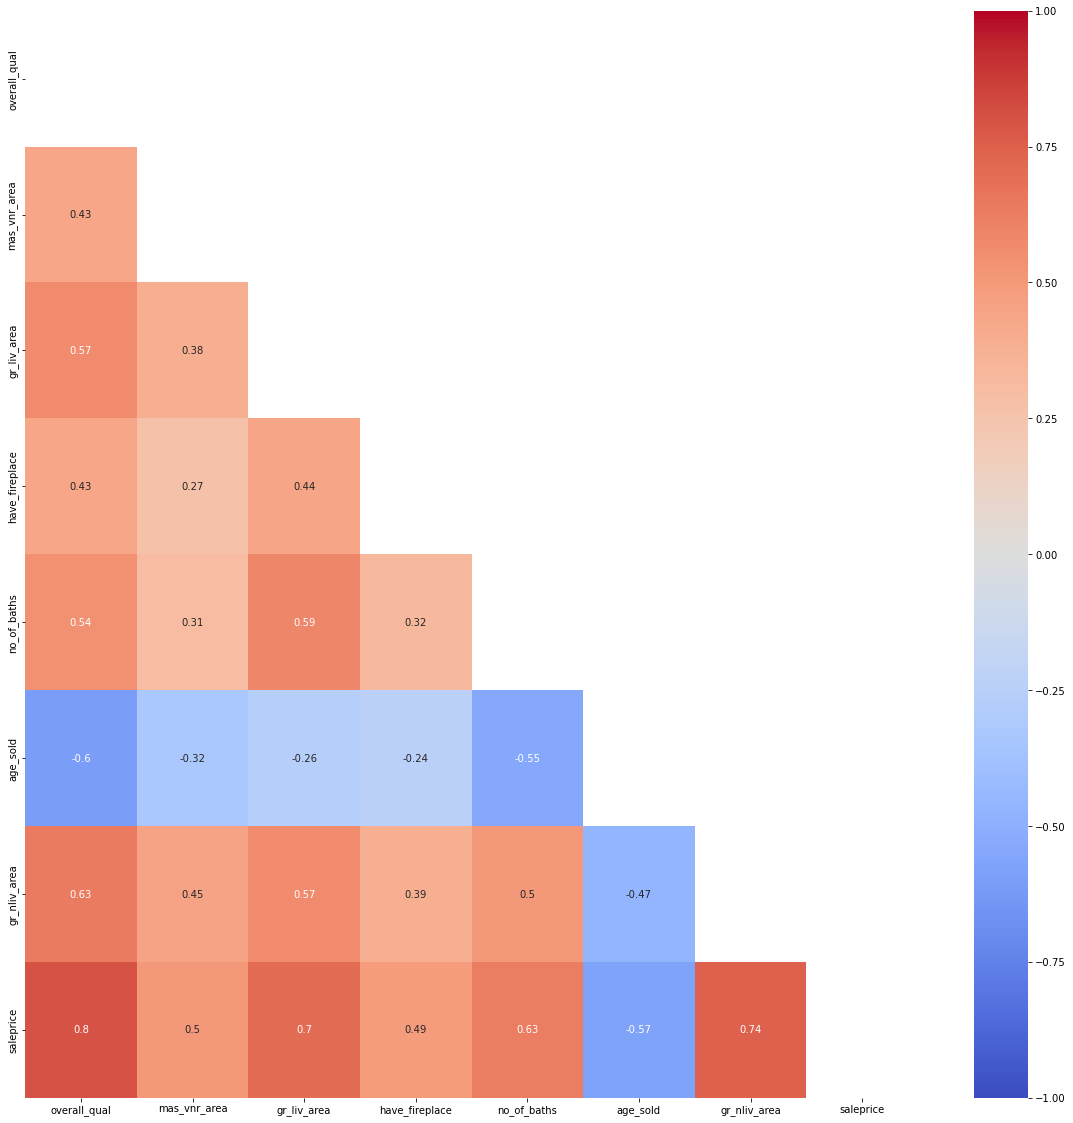

In [20]:
mask = np.zeros_like(train_clean[num_list].corr())
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(20,20))
sns.heatmap(train_clean[num_list].corr(), annot=True,\
            mask=mask, vmin=-1, vmax=1, cmap='coolwarm');

We can see at the bottom of the heat map that saleprice has a good correlation with the features selected.

### Using VIF to check for multicollinearity

In [21]:
# Check for collinearity between features using VIF (Variance Inflation Factor)
# If higher than 10, considered high correlation with other independent variables

def vif_cal(df):
    vif_data = pd.DataFrame()
    features_list = df.select_dtypes(include = ['int64', 'float64']).columns
    
    # create a feature column in df to show feature name
    vif_data['feature'] = features_list
    
    # create a VIF column in df to show VIF
    vif_data['VIF'] = [variance_inflation_factor(df[features_list].values, i)\
                       for i in range(len(features_list))]
    
    return vif_data[(vif_data['VIF']>10) & (vif_data['feature']!='saleprice')]

In [22]:
vif_cal(train_clean).sort_values(by='VIF', ascending=False)

,feature,VIF
0,overall_qual,29.077088
2,gr_liv_area,24.796464
6,gr_nliv_area,17.682035
7,no_of_baths,15.238044


The VIF for the above features has already been reduced greatly with the elimination of many features. It is unlikely that we can get rid of multicollinearity completely. 

In [23]:
# recheck to see if there are any funny data
train_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
mas_vnr_area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
gr_liv_area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
have_fireplace,2051.0,0.512433,0.499967,0.0,0.0,1.0,1.0,1.0
saleprice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0
age_sold,2051.0,36.066797,30.211061,-1.0,7.0,34.0,54.0,136.0
gr_nliv_area,2051.0,1713.978059,657.248876,0.0,1278.5,1619.0,2099.5,8034.0
no_of_baths,2051.0,2.189907,0.816381,1.0,1.5,2.0,2.5,7.0


### Step 5. Check for outliers

In [24]:
# plot scatterplots to see correlations between sale price and numerical features
def subplot_scatter(df, col_list):
    
    # number of rows determined by length of list, 4 columns in plot
    ncols = 4
    nrows =  int(np.ceil(len(col_list)/ncols))
    
    #create subplot
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    
    #dist plot settings
    for i, col in enumerate(col_list):
        sns.regplot(y=df.saleprice, x=df[col], ax=ax[i],\
                    scatter_kws={'facecolors':'skyblue','edgecolor':'skyblue'},\
                    line_kws = {'color':'grey'})                       #create dist
        ax[i].set_title(f'{col} vs saleprice', fontsize=14)            #set title
        ax[i].tick_params(labelsize=12)                                #set label size
        ax[i].set_xlabel(col, fontsize=14)                             #set x-label name
        ax[i].set_ylabel('saleprice', fontsize=14)                     #set y-label name
    plt.tight_layout()

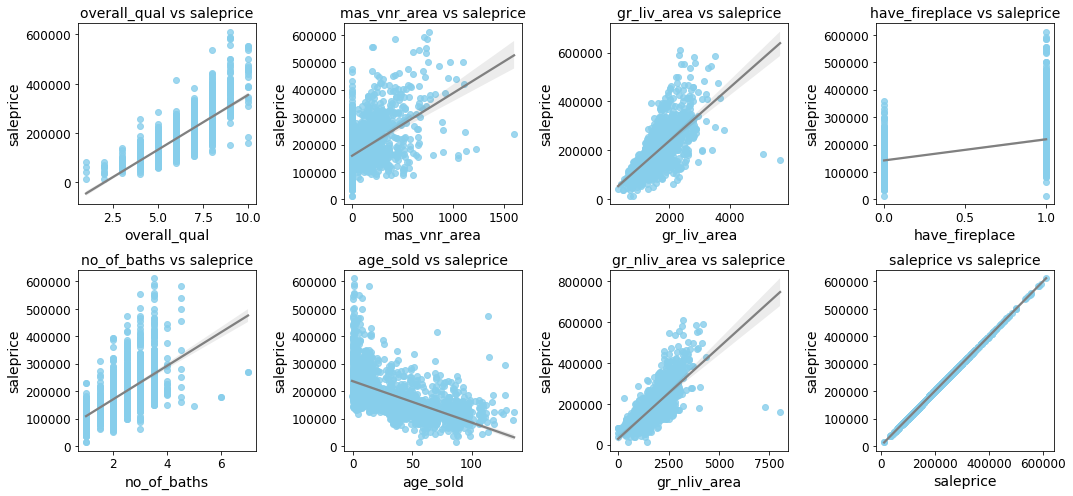

In [25]:
subplot_scatter(train_clean, num_list)

In [26]:
# plot boxplots to see pattern between sale price and categorical feature
def subplot_boxplot(df, col_list):
    
    # number of rows determined by length of list, 4 columns in plot
    ncols = 4
    nrows =  int(np.ceil(len(col_list)/ncols))
    
    #create subplot
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    
    #dist plot settings
    for i, col in enumerate(col_list):
        sns.boxplot(y=df.saleprice, x=df[col], ax=ax[i], width=0.3,\
                    color='skyblue')                                   #create dist
        ax[i].set_title(f'{col} vs saleprice', fontsize=14)            #set title
        ax[i].tick_params(labelsize=12)                                #set label size
        ax[i].set_xlabel(col, fontsize=14)                             #set x-label name
        ax[i].set_ylabel('saleprice', fontsize=14)                     #set y-label name
    plt.tight_layout()

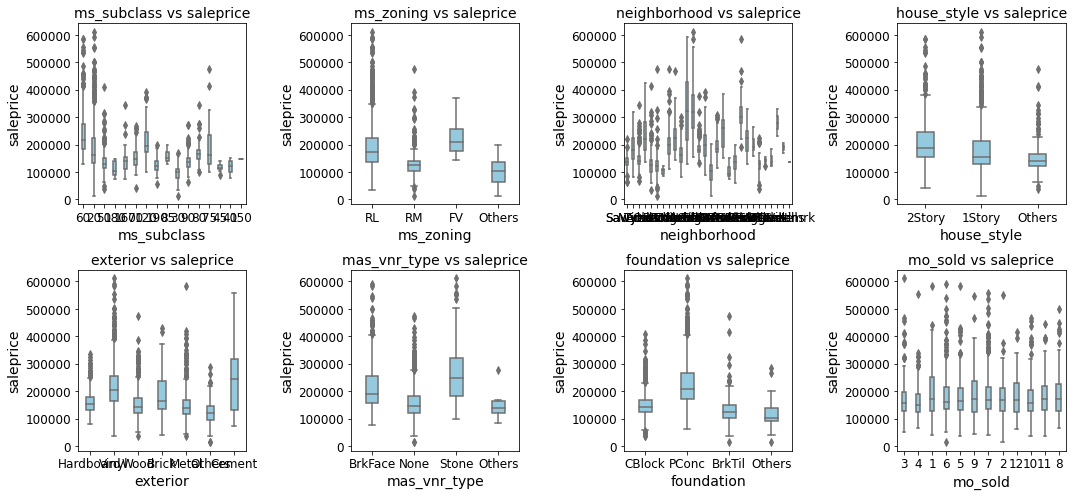

In [27]:
subplot_boxplot(train_clean, cat_list)

### Filter out outliers and improbable data

In [28]:
# mas_vnr_area filter
filter1 = train_clean['mas_vnr_area']<1500

# gr_liv_area filter
filter2 = train_clean['gr_liv_area']<4000

# gr_nliv_area filter
filter3 = train_clean['gr_nliv_area']<5000

# no_of_baths filter
filter4 = train_clean['no_of_baths']<6

#age_sold
filter5 = train_clean['age_sold']>=0

train_clean = train_clean[filter1 & filter2 & filter3 & filter4 & filter5]

## Get Dummies
*Back to [Contents](#Contents:)*

In [29]:
# check on the categorical list we created previously
cat_list

['ms_subclass',
 'ms_zoning',
 'neighborhood',
 'house_style',
 'exterior',
 'mas_vnr_type',
 'foundation',
 'mo_sold']

In [30]:
# dummify the categorical columns
train_final = pd.get_dummies(train_clean, columns=cat_list, drop_first=True)

In [31]:
train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_qual,2044.0,6.108121,1.422686,1.0,5.0,6.0,7.0,10.0
mas_vnr_area,2044.0,97.170744,168.862926,0.0,0.0,0.0,158.0,1129.0
gr_liv_area,2044.0,1494.356654,484.502287,334.0,1128.0,1443.0,1728.0,3820.0
have_fireplace,2044.0,0.511742,0.499984,0.0,0.0,1.0,1.0,1.0
saleprice,2044.0,181367.176125,79334.783913,12789.0,129500.0,162000.0,214000.0,611657.0
...,...,...,...,...,...,...,...,...
mo_sold_5,2044.0,0.125734,0.331630,0.0,0.0,0.0,0.0,1.0
mo_sold_6,2044.0,0.171722,0.377231,0.0,0.0,0.0,0.0,1.0
mo_sold_7,2044.0,0.148239,0.355423,0.0,0.0,0.0,0.0,1.0
mo_sold_8,2044.0,0.081703,0.273978,0.0,0.0,0.0,0.0,1.0


## Model Preparation
*Back to [Contents](#Contents:)*

### Get features matrix X and target vector y

In [32]:
features = train_final.columns.drop(['saleprice'])
X = train_final[features]
y = train_final[['saleprice']]
print(X.shape)
print(y.shape)

(2044, 77)
(2044, 1)


### Train test split 70/30

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)

(1533, 77) (1533, 1)


### StandardScaler

In [34]:
# apply standard scaler to scale variables
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Checking skewness of target

In [35]:
## to check whether the output is normally distributed - balance data
## skew >0.8 consider as moderately skew

def skew_plot(y):
  (mu,sigma) = norm.fit(y)
  print(f'mu = {round(mu,2)}, sigma = {round(sigma,2)}, skew = {y.skew()[0]}')
  f, ax = plt.subplots(figsize=(10,5))
  ax = sns.distplot(y, fit=norm)
  plt.xlabel('Sale Price', fontsize=15)
  plt.ylabel('Frequency', fontsize=15)
  plt.title('Distribution of Housing Sale Price', fontsize=15)
  plt.show()

mu = 181367.18, sigma = 79315.37, skew = 1.5607636209921676


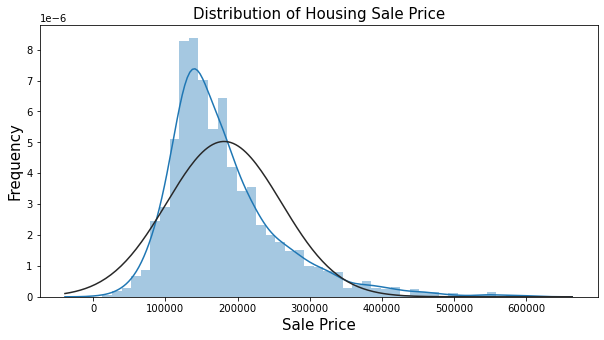

In [36]:
skew_plot(y)

Sale price is skewed positively, as it shows a tail on the right side of the distribution. It is likely a linear model will not work so well on predicting homes with higher sales price.

## Model Fitting
*Back to [Contents](#Contents:)*

### Linear Regression - Base model

In [37]:
# use linear regression to test
lr=LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [38]:
y_train_pred = lr.predict(X_train_sc)
y_test_pred = lr.predict(X_test_sc)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
pct_diff = round((1-rmse_test/rmse_train)*100,3)

print(rmse_train, rmse_test, f'{pct_diff}%')

26563.841913232234 26882.46787362843 -1.199%


### Use GridSearchCV to look through LR, Ridge, Lasso and ElasticNet models

In [39]:
# Initialze the estimators
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()
model4 = ElasticNet()

# Initialize the hyperparameters for each dictionary
param1 = {}
param1['classifier'] = [model1]

# alphas from 0.001 to 100, logspace
param2 = {}
param2['classifier__alpha'] = np.logspace(-3,2,50) 
param2['classifier'] = [model2]

# alphas from 0.1 to 100, logspace
param3 = {}
param3['classifier__alpha'] = np.logspace(-1,2,50)
param3['classifier'] = [model3]

param4 = {}
param4['classifier__alpha'] = np.linspace(0.5,1.0,100)
param4['classifier__l1_ratio'] = np.linspace(0,1,10)
param4['classifier'] = [model4]

# Create pipeline
pipeline = Pipeline([('classifier', model1)]) #for starting from model1
params = [param1, param2, param3, param4]     #multiple params will do the job of passing thorugh each model here

# Run GridsearchCV
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [40]:
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LinearRegression()]},
                         {'classifier': [Ridge(alpha=12.067926406393289)],
                          'classifier__alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8....
       0.9040404 , 0.90909091, 0.91414141, 0.91919192, 0.92424242,
       0.92929293, 0.93434343, 0.93939394, 0.94444444, 0.94949495,
       0.95454545, 0.95959596, 0.96464646, 0.96969697, 0.97474747,
       0.97979798, 0.98484848, 0.98989899, 0.99494949, 1.        ]),
                          'classifier__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])}],
             scoring='neg_mean_squared_error')

In [41]:
# evaluation of the best model
# best param
print('Best params: ', gs.best_params_)
print('\n')

# best estimator
print('Best estimator: ', gs.best_estimator_)


Best params:  {'classifier': Ridge(alpha=12.067926406393289), 'classifier__alpha': 12.067926406393289}


Best estimator:  Pipeline(steps=[('classifier', Ridge(alpha=12.067926406393289))])


### Evaluating best model

In [42]:
# Instantiate model
ridge = Ridge(alpha=12)

# Fit model using optimal alpha
ridge.fit(X_train_sc, y_train)

# Generate predictions
y_train_pred = ridge.predict(X_train_sc)
y_test_pred = ridge.predict(X_test_sc)

# Evaluate model using RMSE
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
pct_diff = round((1-rmse_test/rmse_train)*100,2)

print('RMSE for train set: ', rmse_train)
print('RMSE for test set: ', rmse_test)
print('% difference must be less than 2.24%:', pct_diff, '%')

RMSE for train set:  26607.298697357186
RMSE for test set:  26933.38796634249
% difference must be less than 2.24%: -1.23 %


The Ridge model tested has good generalisation. RMSE score is also very low. The model should work well on a unseen test dataset.

In [43]:
# coefficients from the model to explain per unit change in feature on the sale price

# pd.set_option('display.max_rows',None)

pd.DataFrame({'coef':ridge.coef_[0], 'category':X_train.columns}).\
sort_values(by = 'coef', ascending = False).set_index('category')

,coef
category,
gr_liv_area,20516.725646
gr_nliv_area,18836.684134
overall_qual,18479.857903
ms_subclass_20,13948.164068
mas_vnr_area,9771.275104
...,...
neighborhood_Gilbert,-5164.202666
neighborhood_CollgCr,-5552.152252
neighborhood_NWAmes,-5976.664615


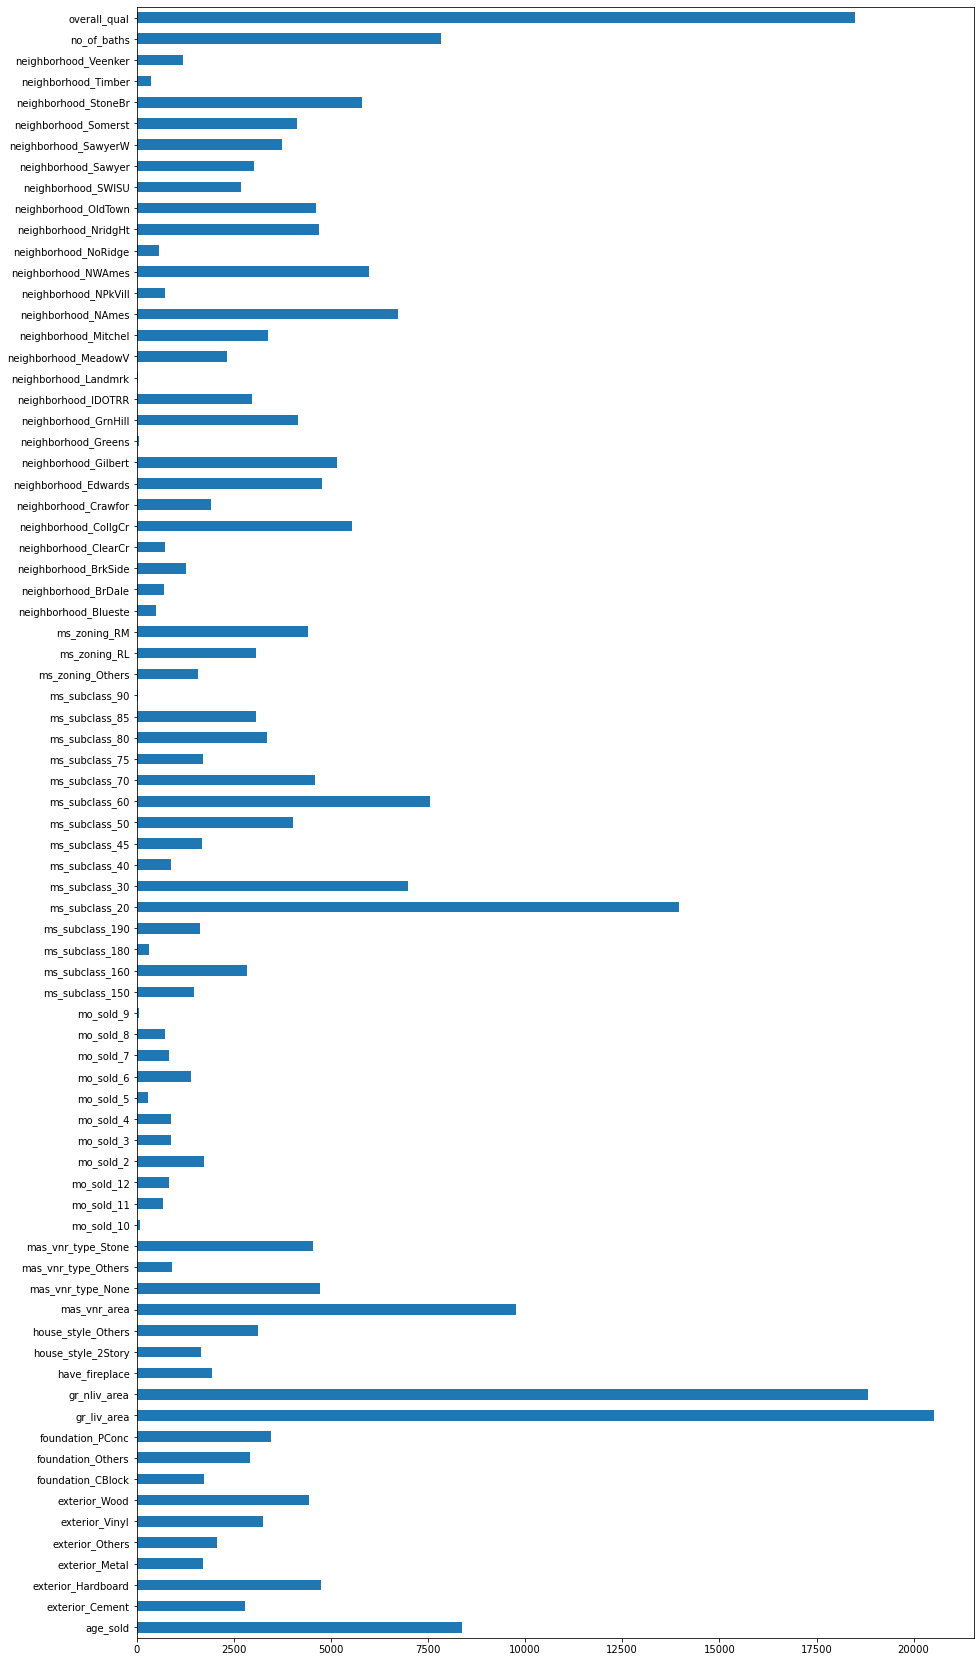

In [44]:
# which variable has the greatest coefficient

pd.Series(abs(ridge.coef_[0]), index=X.columns).sort_index().\
plot.barh(figsize=(15, 30));

Gross living and non living area, as well as overall quality, seems to have the largest impact on sales price.

### Visualizations to infer results

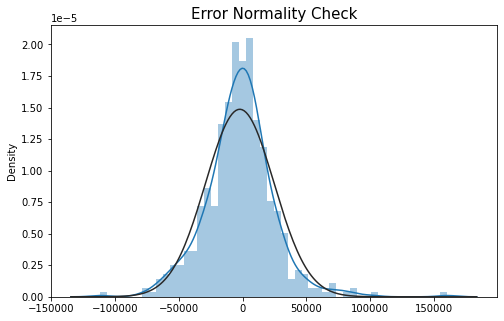

In [45]:
# Are errors normally distributed?

fig,ax = plt.subplots(figsize=(8,5))
resids = y_test - y_test_pred

sns.distplot(resids,bins=50,fit=norm)
plt.title('Error Normality Check',size=15);

Yes, from the chart it looks like the errors are quite normally distributed.

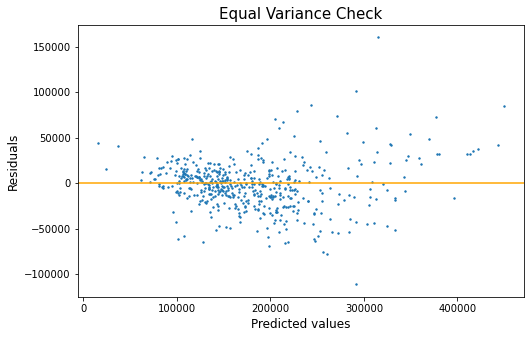

In [46]:
# Do errors have equal variance

fig,ax = plt.subplots(figsize=(8,5))

plt.scatter(y_test_pred, resids,s=2)
plt.axhline(0,color='orange')
plt.title('Equal Variance Check', size=15)
plt.xlabel('Predicted values', size=12)
plt.ylabel('Residuals', size=12);

Errors look to randomly distributed and have equal variance.

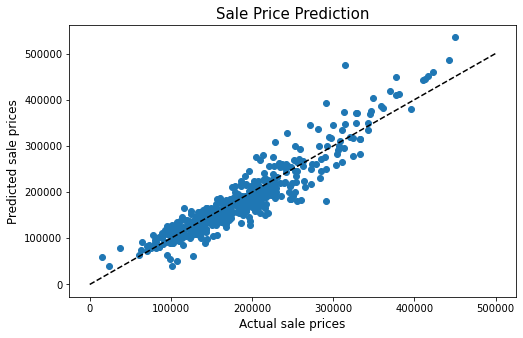

In [47]:
# Linearity check

fig,ax = plt.subplots(figsize=(8,5))
plt.scatter(y_test_pred, y_test)

plt.plot([0, 5e5], [0, 5e5], ls="--", c="black")
plt.title('Sale Price Prediction',size=15)
plt.xlabel('Actual sale prices', size=12)
plt.ylabel('Predicted sale prices', size=12);

The model seems to be following a nice linear pattern.

## Kaggle Submission
*Back to [Contents](#Contents:)*

In [48]:
# PREPROCESSING FUNCTION PUT TOGETHER

def preprocessing(input_df):
    
    # make copy of the input df
    copy_df = input_df.copy()
    
    # clean up column names
    copy_df.columns = copy_df.columns.str.lower()
    copy_df.columns = copy_df.columns.str.replace(' ','_')
    
    # drop skewed columns
    copy_df.drop(skewed_cols_todrop, axis=1, inplace=True)
    
    # fill nulls
    copy_df = fillnull(copy_df)
    
    # clean data
    copy_df = cleandata(copy_df)
    
    return copy_df

In [49]:
# Take note, there is no saleprice column in the test csv dataset
test_clean = preprocessing(test)
print(test_clean.shape)
test_clean.head()

(878, 15)


,ms_subclass,ms_zoning,neighborhood,house_style,overall_qual,exterior,mas_vnr_type,mas_vnr_area,foundation,gr_liv_area,have_fireplace,mo_sold,age_sold,gr_nliv_area,no_of_baths
0,190,RM,OldTown,2Story,6,Others,None,0.0,Others,1928,0,4,96,1632,2.0
1,90,RL,Sawyer,1Story,5,Wood,None,0.0,CBlock,1967,0,8,29,2717,2.0
2,60,RL,Gilbert,2Story,7,Vinyl,None,0.0,PConc,1496,1,9,0,1204,3.5
3,30,RM,OldTown,1Story,5,Wood,None,0.0,CBlock,968,0,7,84,1632,1.0
4,20,RL,NAmes,1Story,6,Wood,BrkFace,247.0,CBlock,1394,1,7,46,2169,2.5


In [50]:
# perform get dummies first
test_final = pd.get_dummies(test_clean, columns=cat_list, drop_first=True)

In [51]:
# all the columns after get_dummies that are fitted in the training set
# but not in the final test csv set
# train_final has saleprice column

missing_columns = []
for col in train_final.columns:
    if col not in list(test_final.columns):
        missing_columns.append(col)
        
print(missing_columns)

['saleprice', 'ms_subclass_150', 'neighborhood_GrnHill', 'neighborhood_Landmrk']


In [52]:
# add columns except saleprice that are missing and fill with all zeros
for col in missing_columns:
    if col != 'saleprice':
        test_final[col]=0

In [53]:
# reorder the columns based on X.columns
test_final = test_final[X.columns]

# scale all the features using StandardScalar
test_final_sc = ss.transform(test_final)

# check final shape of test set
test_final_sc.shape

(878, 77)

### Predicting sale price using best model

In [54]:
# extract the values from ridge_pred array
ridge_pred = ridge.predict(test_final_sc)
ridge_pred_list = []
for i in ridge_pred:
    ridge_pred_list.append(i[0])
pd.DataFrame(ridge_pred_list).describe()

,0
count,878.000000
mean,180155.584426
std,73486.486170
min,26747.856052
25%,126282.800481
50%,167226.772181
75%,222091.309644
max,500101.694362


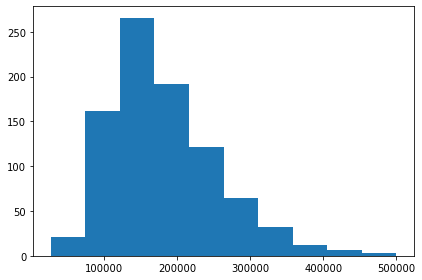

In [55]:
# plotting the distribution of the predicted results
plt.hist(ridge_pred_list)
plt.tight_layout()

In [56]:
# Export out the csv file for Kaggle submission
export = pd.DataFrame({'Id': test['Id'], 'SalePrice': ridge_pred_list})
print(export.shape)
export.to_csv('./datasets/testsubm_030722.csv', index=False)

(878, 2)


In [57]:
print("My public score is 32158.")
print("My private score is 23723.")

My public score is 32158.
My private score is 23723.


*Back to [Contents](#Contents:)*